# Homework 5


Hồ Thanh Nhân - 21127122

---

### Import neccessary libraries

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Linear Regression Error

## 1.

We have the formula:
$$ E_D [E_{in} (W_{in})] = \sigma^2 \left(1 - \frac{d + 1}{N}\right) $$

Let's calculate all the result and print all of them at once:

In [132]:
sigma = 0.1
d = 8

N_arr = np.array([10, 25, 100, 500, 1000]) # [a], [b], [c], [d], [e] respectively

print('The results of sentences [a], [b], [c], [d], [e] are respectively:\n', sigma ** 2 * (1 - (d + 1) / N_arr))

The results of sentences [a], [b], [c], [d], [e] are respectively:
 [0.001   0.0064  0.0091  0.00982 0.00991]


Therefore, the smallest number of examples $N$ that will result in an expected $E_{in}$ greater than $0.008$ is **[c] $100$**

# Nonlinear Transforms

$$
\Phi(1,x₁,x₂) = (1,x₁²,x₂²)
$$

## 2. [1]

Let's present with a plot of the box $[-1, 1] \times [-1,1]$ where a hyperbola divides the box into three sections. Points located in the left and right sections are categorized as -1, while points in the middle section are labeled as +1.

Our task is to select the weight vector $\tilde{w}$ in the transformed space from the provided options that will accomplish the specified classification.

In [133]:
N = 1000

def classify(X, w):
    return np.sign(np.dot(X, w))


def check_corresponding(w_tilde):
        
    x1 = np.random.uniform(-1, 1, N)
    x2 = np.random.uniform(-1, 1, N)
    Z = np.array([np.ones(N), x1 * x1, x2 * x2]).T
    
    classification = classify(Z, w_tilde)
    
    plt.plot(x1[classification == -1], x2[classification == -1], 'r_')
    plt.plot(x1[classification == +1], x2[classification == +1], 'b+')
    
    plt.ylim(-1,1)
    plt.xlim(-1,1)
    plt.show()

Let's assume that $\tilde{w}_0 = 0.2$

In [134]:
w_tilde_0 = 0.2

### [a] $\tilde{w}_1 = 0, \tilde{w}_2 > 0$

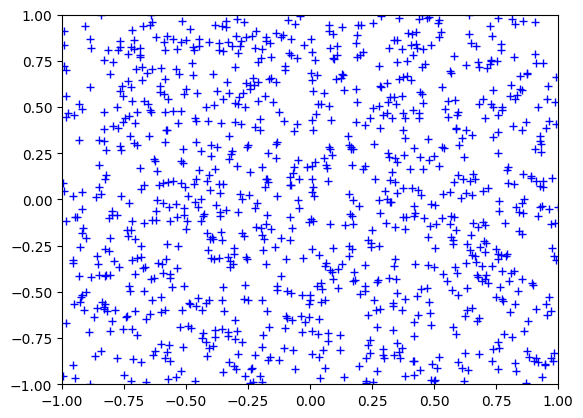

In [135]:
w_tilde_1 = 0
w_tilde_2 = 2

check_corresponding(w_tilde = np.array([w_tilde_0, w_tilde_1, w_tilde_2]))

### [b] $\tilde{w}_1 > 0, \tilde{w}_2 = 0$

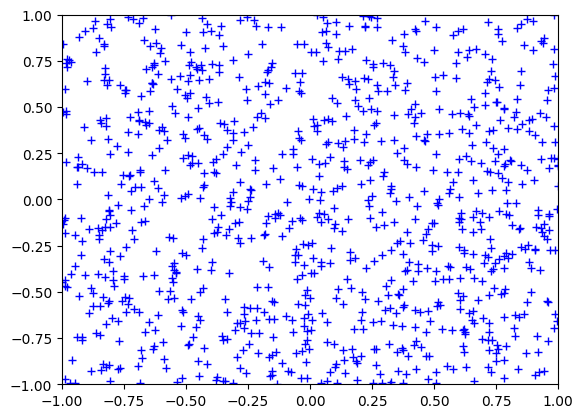

In [136]:
w_tilde_1 = 2
w_tilde_2 = 0

check_corresponding(w_tilde = np.array([w_tilde_0, w_tilde_1, w_tilde_2]))

### [c] $\tilde{w}_1 > 0, \tilde{w}_2 > 0$

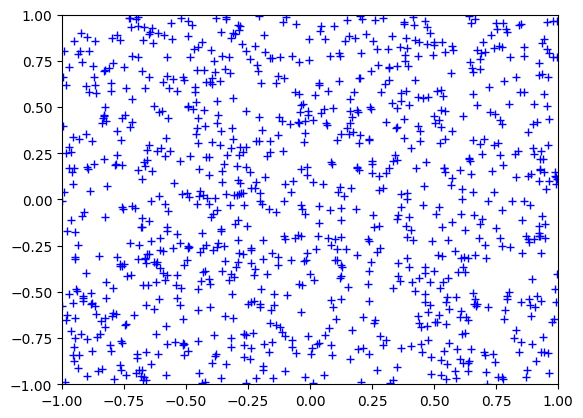

In [137]:
w_tilde_1 = 2
w_tilde_2 = 1.2

check_corresponding(w_tilde = np.array([w_tilde_0, w_tilde_1, w_tilde_2]))

### [d] $\tilde{w}_1 < 0, \tilde{w}_2 > 0$

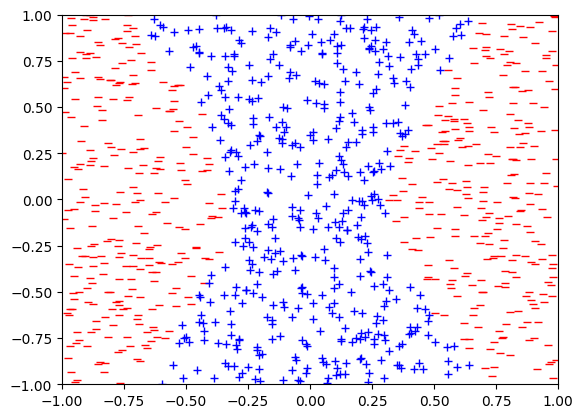

In [138]:
w_tilde_1 = -2
w_tilde_2 = 0.8

check_corresponding(w_tilde = np.array([w_tilde_0, w_tilde_1, w_tilde_2]))

### [e] $\tilde{w}_1 > 0, \tilde{w}_2 < 0$

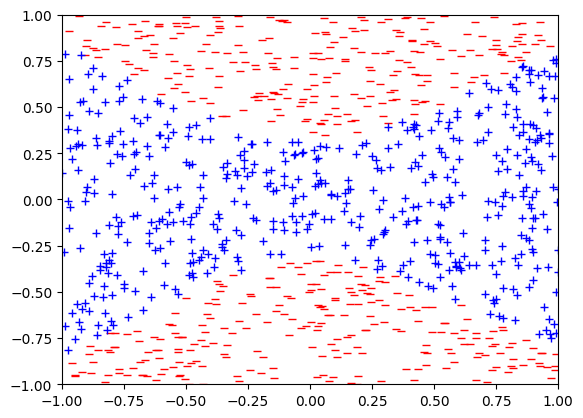

In [139]:
w_tilde_1 = 1.2
w_tilde_2 = -2

check_corresponding(w_tilde = np.array([w_tilde_0, w_tilde_1, w_tilde_2]))

### Conclusion

Hence, based on the aforementioned visualizations, the answer might be **[d] $\tilde{w}_1 < 0, \tilde{w}_2 > 0$**

## 3. [2]

We are given:

$$\Phi_4: x \rightarrow (1,x₁,x₂,x₁²,x₁x₂,x₂²,x₁^{3},x₁^{2}x₂,x₁x₂^{2},x₂^{3},x₁^{4},x₁^{3}x₂,x₁^{2}x₂^{2},x₁x₂^3,x₂^4)$$

We have $\tilde{d} = 14$, so $d_{VC} \le \tilde{d} + 1 = 14 + 1 = 15\ (1)$

$\Rightarrow$ We exclude [d] and [e].

Now, we will prove that $d_{VC} \ge 15$.

We will show that with the specified hypothesis set, which includes 15 parameters and polynomials of up to the fourth degree, we can shatter 15 points.

### Generate a list of all $2^{15}$ dichotomies

In [140]:
def gen_dichotomies(N):

    # Every number in the range from 0 to 2^N-1 is transformed into its corresponding binary representation
    # We ensure that the string has a length of 15 by padding it with zeros if necessary
    binaries = [list(map(int, bin(i)[2:].zfill(N))) for i in range(2 ** N)]

    # Utilize the binary strings to produce 2^15 dichotomies (classifications)
    dichotomies = [np.array([1 if x else -1 for x in bin_number]) for bin_number in binaries]
        
    return dichotomies

### Determine how many of the given dichotomies can be correctly generated

In [141]:
N = 15
dichotomies = gen_dichotomies(N)

def shatter_N_randomly_distributed_points(N, dichotomies):

    # Create 15 random points in a plot of the box [-1,1] x [-1,1]
    x1 = np.random.uniform(-1, 1, N)
    x2 = np.random.uniform(-1, 1, N)

    # Create feature matrix Z
    Z = np.array([np.ones(N), x1, x2, x1 ** 2, x1 * x2, x2 ** 2, x1 ** 3, x1 ** 2 * x2, x1 * x2 ** 2, x2 ** 3, x1 ** 4, x1 ** 3 * x2, x1 ** 2 * x2 ** 2, x1 * x2 ** 3, x2 ** 4]).T

    # Compute the pseudo-inverse
    Z_dagger = np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)

    count_correct_classifications = 0

    # Go through all 2^N dichotomies
    for y_class in dichotomies:

        # Use linear regression to get weight vector
        w_tilde = np.dot(Z_dagger, y_class)

        # Check if weight vector generates correct dichotomy
        if sum(y_class != np.sign(np.dot(Z, w_tilde))) == 0:
            count_correct_classifications += 1

    return count_correct_classifications

### Checking how many of the given dichotomies can be shattered by a linear model trained on N randomly distributed points and providing feedback on whether the model was able to shatter all points or not

In [142]:
num_generated_dichotomies = shatter_N_randomly_distributed_points(N, dichotomies)

print("Number of correct classifications is:", num_generated_dichotomies)

# Check whether the number of correctly generated dichotomies is equal to 2^N
if num_generated_dichotomies == 2 ** N:
    print("The model was able to correctly generate all possible dichotomies, so it shattered", N, "points.")
else:
    print("N =", N, "is either a break point or the points were not positioned optimally.")

Number of correct classifications is: 32768
The model was able to correctly generate all possible dichotomies, so it shattered 15 points.


Now, we can see that at least $d_{VC} \ge 15\ (2)$

$(1) (2) \Rightarrow d_{VC} = 15$

### Conclusion

Therefore, the answer is **[c] 15**

# Gradient Descent

## 4.

We have: $$E(u, v) = (ue^v - 2ve^{-u})^2$$

$$\Rightarrow \frac{\partial E}{\partial u} = 2(e^v + 2ve^{-u})(ue^v - 2ve^{-u})$$

Therefore, the answer is **[e] $2(e^v + 2ve^{-u})(ue^v - 2ve^{-u})$**

## 5-6. [3]

We have: $$E(u, v) = (ue^v - 2ve^{-u})^2$$

$$\Rightarrow \frac{\partial E}{\partial v} = 2(ue^v - 2e^{-u})(ue^v - 2ve^{-u})$$

### The nonlinear error surface

In [143]:
e = math.e

def E(u, v):
    return (u * e ** v - 2 * v * e ** (-u)) ** 2

### Function for solving problem 5 and 6

In [144]:
u = np.float64(1)
v = np.float64(1)

def problem_5_6(u, v):
    iterations = 0
    latest_u_v = np.array([u, v], dtype=np.float64)
    eta = np.float64(0.1)

    while True:
        
        # The gradient
        dE_on_du = np.float64(2 * (e ** v + 2 * v * e ** (-u)) * (u * e ** v - 2 * v * e ** (-u)))
        dE_on_dv = np.float64(2 * (u * e ** v - 2 * e ** (-u)) * (u * e ** v - 2 * v * e ** (-u)))

        gradient = np.array([dE_on_du, dE_on_dv], dtype=np.float64)

        latest_u_v += -eta * gradient

        u, v = latest_u_v

        iterations += 1

        if (E(u, v) < 10 ** (-14)):
            break

    return iterations, latest_u_v

### Find iterations and the closest values

In [145]:
# Find iterations and final (u, v)
iterations, final_u_v = problem_5_6(u, v)
print('Number of iterations which take for the error E(u, v) to fall below 10^(-14) for the first time is:', iterations)

# Find min distance
min_dist = float('inf')
min_point = None

choices = [(1.000, 1.000), (0.713, 0.045), (0.016, 0.112), (-0.083, 0.029), (0.045, 0.024)]

for point in choices:
    x = np.array(point, dtype=np.float64)
    distance = np.float64(np.linalg.norm(final_u_v - x))
    print('Point x = ', x, 'has the distance =', distance)
    if min_dist > distance:
        min_dist = distance
        min_point = x

print('The choice that has the closest values (in Euclidean distance) among the choices to the final (u, v) is:', min_point, 'with the minimum distance is:', min_dist)
    

Number of iterations which take for the error E(u, v) to fall below 10^(-14) for the first time is: 10
Point x =  [1. 1.] has the distance = 1.365717886924672
Point x =  [0.713 0.045] has the distance = 0.6685948857743971
Point x =  [0.016 0.112] has the distance = 0.0926123232021653
Point x =  [-0.083  0.029] has the distance = 0.12783573228217807
Point x =  [0.045 0.024] has the distance = 0.0002669218610597792
The choice that has the closest values (in Euclidean distance) among the choices to the final (u, v) is: [0.045 0.024] with the minimum distance is: 0.0002669218610597792


### Conclusion

Therefore, the answer for Problem 5 is **[d] 10** and the answer for Problem 6 is **[e] (0.045, 0.024)**

## 7.

### Function for solving problem 7

In [146]:
u = np.float64(1)
v = np.float64(1)
iterations = 15

def problem_7(u, v):
    latest_u_v = np.array([u, v], dtype=np.float64)
    eta = np.float64(0.1)

    for _ in range(iterations):
        
        # Step 1: Move only along the u coordinate to reduce the error
        dE_on_du = np.float64(2 * (e ** v + 2 * v * e ** (-u)) * (u * e ** v - 2 * v * e ** (-u)))
        gradient = np.array([dE_on_du, 0], dtype=np.float64)
        latest_u_v += -eta * gradient

        # Step 2: Reevaluate and move only along the v coordinate to reduce the error
        u, v = latest_u_v
        dE_on_dv = np.float64(2 * (u * e ** v - 2 * e ** (-u)) * (u * e ** v - 2 * v * e ** (-u)))
        gradient = np.array([0, dE_on_dv], dtype=np.float64)
        latest_u_v += -eta * gradient

        u, v = latest_u_v

    return E(u, v)

### Find the error after 15 full iterations

In [147]:
print('The error E(u, v) after 15 full iterations is:', problem_7(u, v))

The error E(u, v) after 15 full iterations is: 0.13981379199615324


So, after 15 full iterations, the error $E(u, v)$ is closest to $10^{-1}$.

### Conclusion

Therefore, the answer is: **[a] $10^{-1}$**

# Logistic Regression

## 8.

## 9.

# PLA as SGD

## 10.

# References:

   [1] Github, Edgardo Deza, Generalization Error - Solution to Problem 1, last commit date: 27/10/2017, access date: 3/12/2023, https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_1_Generalization_Error.ipynb

   [2] RPubs by RStudio, Giuliano Mega, Learning From Data - Homework 4, last updated: around 2017-2018, access date: 3/12/2023, https://rpubs.com/giuliano_mega/378392

   [3] Github, Edgardo Deza, Problem 8 - Solution Problem 8, last commit date: 24/10/2017, access date: 3/12/2023, https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_8_VC_dimension.ipynb

   [4] Github, roessland, Learning From Data HW04 - 9, last commit date: 27/02/2019, access date: 3/12/2023, https://github.com/roessland/learning-from-data/blob/master/homework-4/lfd-homework-04.ipynb

   [5] Github, Edgardo Deza, Homework 4 - Problem 10, last commit date: 1/11/2017, access date: 3/12/2023, https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_4/homework_4_problem_9_10_VC_dimension.ipynb